In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob

In [5]:
folder_path ="/Users/praveenkumar/Documents/4th_sem/CV/Chess"

In [6]:
import cv2

selected_img = []

for i in range(1, 11):
    # Read the image directly without constructing the file path
    img = cv2.imread(f"chess ({i}).jpg")
    
    # Convert to RGB format
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Append the RGB image to the list
    selected_img.append(rgb_img)


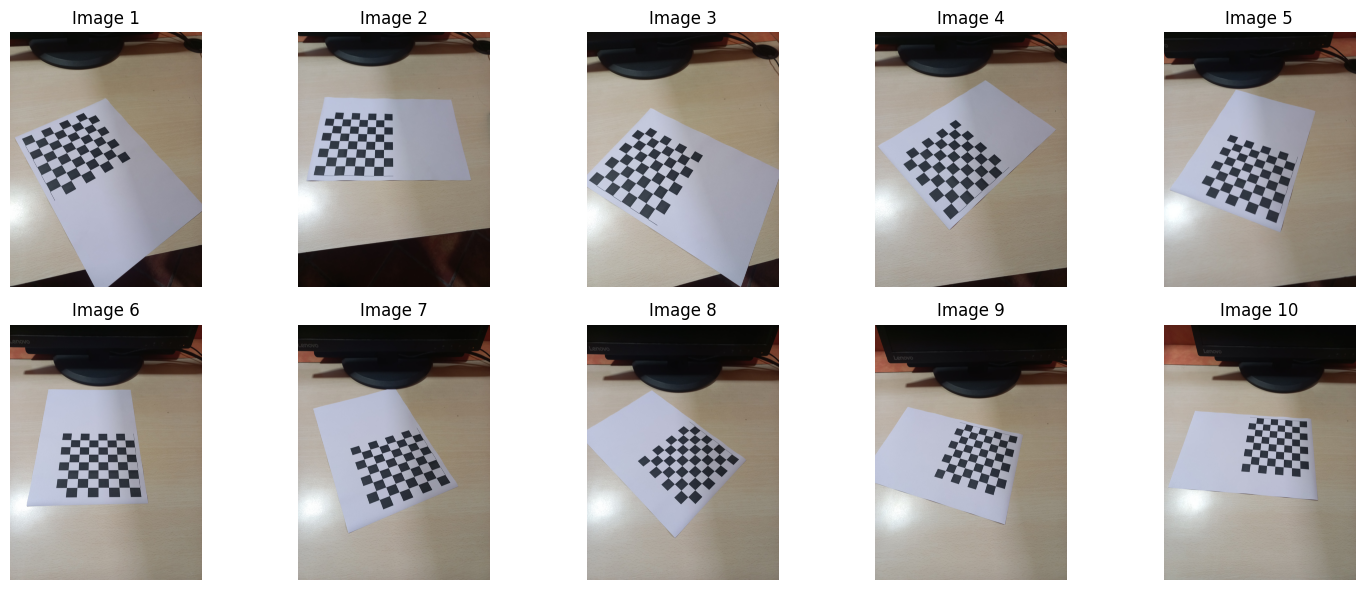

In [7]:
import matplotlib.pyplot as plt

# Create a grid of subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each image and plot it on a subplot
for i, img in enumerate(selected_img):
    ax = axes[i]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()



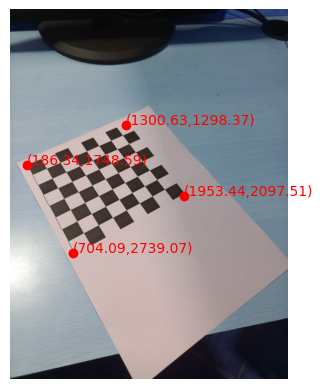

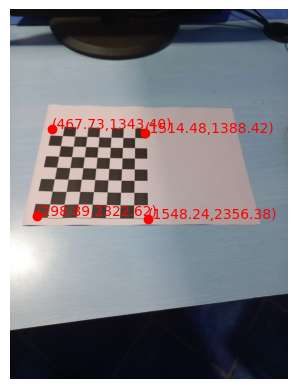

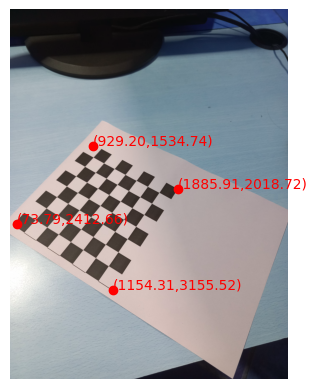

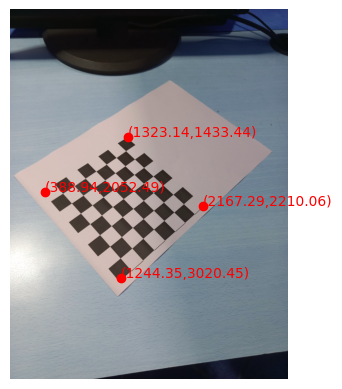

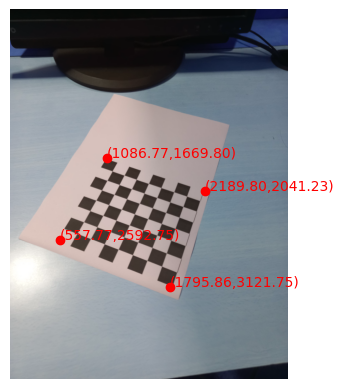

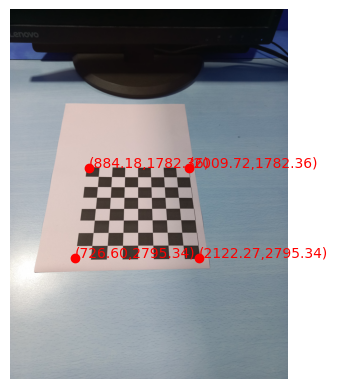

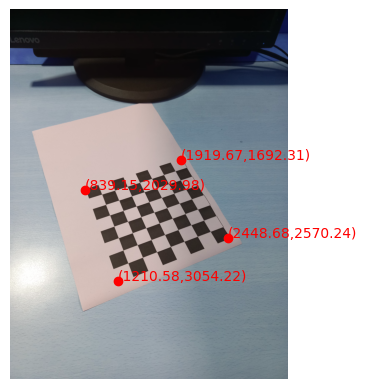

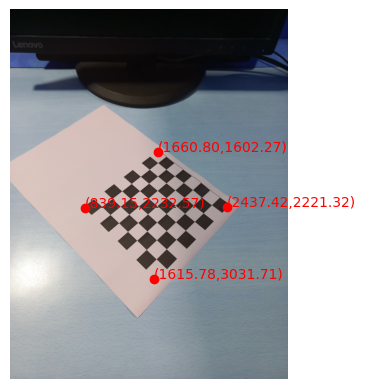

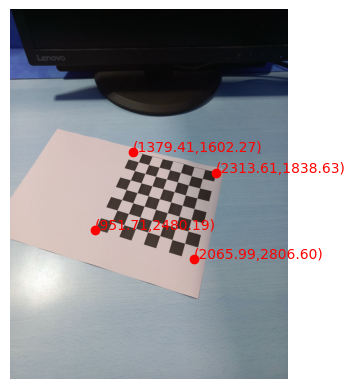

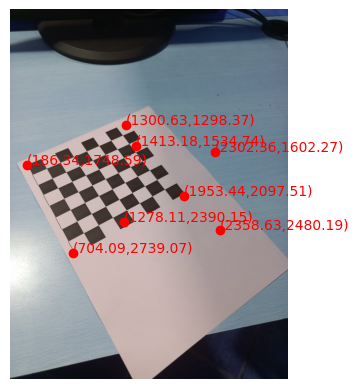

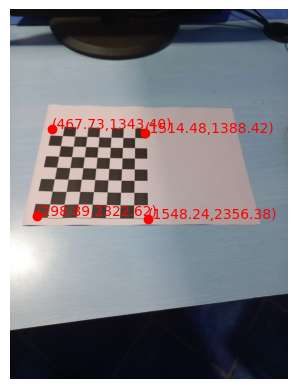

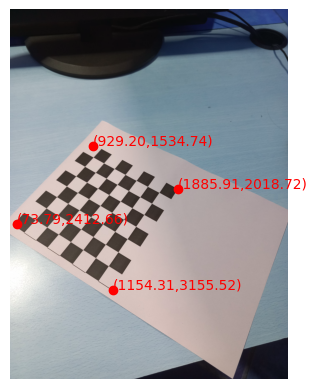

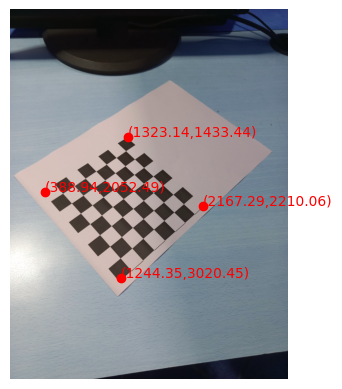

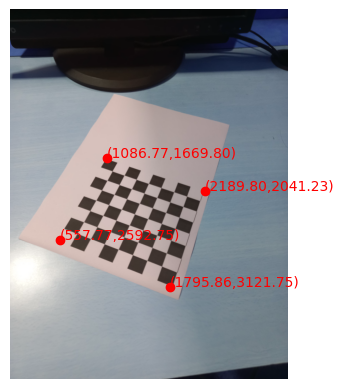

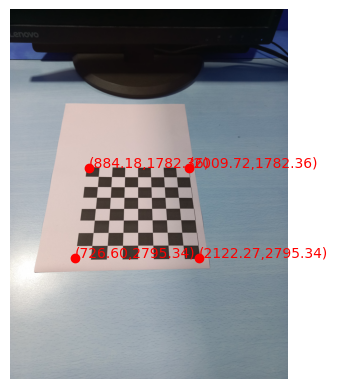

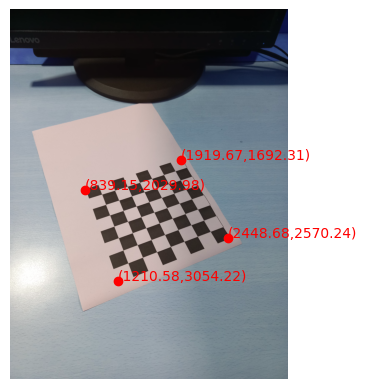

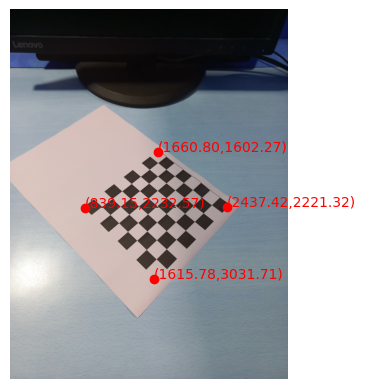

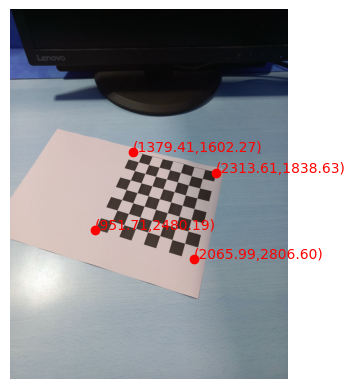

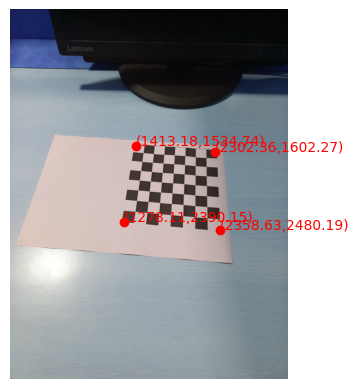

In [8]:
import cv2
import tkinter as tk
from PIL import Image, ImageTk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class PointSelector:
    def __init__(self, images):
        self.images = images
        self.points_list = []  # List to store points for all images
    
    def get_point_coordinates(self, image):
        self.points = []  # Reset points for each image
        self.current_image = image
        
        self.root = tk.Tk()
        self.root.title("Point Coordinates")
        
        # Convert OpenCV image to PIL format
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_pil = Image.fromarray(image_rgb)
        self.image_tk = ImageTk.PhotoImage(image_pil)
        self.image_reference = self.image_tk  # Keep reference to the PhotoImage
        
        fig, ax = plt.subplots()
        ax.imshow(image_rgb)
        ax.axis('off')

        self.canvas = FigureCanvasTkAgg(fig, master=self.root)
        self.canvas_widget = self.canvas.get_tk_widget()
        self.canvas_widget.pack()
        
        self.canvas.mpl_connect('button_press_event', self.on_click)
        
        self.root.mainloop()
    
    def on_click(self, event):
        x, y = event.xdata, event.ydata
        if x is not None and y is not None:
            self.points.append((x, y))
            plt.plot(x, y, 'ro')
            plt.text(x + 5, y - 5, f'({x:.2f},{y:.2f})', color='red')
            self.canvas.draw()
        
        # Check if 4 points are selected to close the window
        if len(self.points) == 4:
            self.close_window()
    
    def close_window(self):
        self.points_list.append(self.points)  # Append points for current image
        self.root.destroy()

# Example usage:
points_list = []
pts_img_list = []
selector = PointSelector(selected_img)
for img in selected_img:
    selector.get_point_coordinates(img)

points_list = selector.points_list

# Plotting all images with selected points and their coordinates
for img, points in zip(selected_img, points_list):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    for point in points:
        plt.plot(point[0], point[1], 'ro')  # Plotting selected points
        plt.text(point[0] + 5, point[1] - 5, f'({point[0]:.2f},{point[1]:.2f})', color='red')  # Annotating coordinates
    plt.axis('off')
    plt.show()


In [9]:
points_list

[[(186.3398268398273, 1748.590909090909),
  (1300.6255411255415, 1298.374458874459),
  (1953.439393939395, 2097.508658008658),
  (704.0887445887452, 2739.0670995671)],
 [(298.8939393939395, 2322.616883116883),
  (467.72510822510867, 1343.3961038961038),
  (1514.4783549783556, 1388.4177489177487),
  (1548.2445887445892, 2356.383116883117)],
 [(73.78571428571468, 2412.660173160173),
  (929.19696969697, 1534.738095238095),
  (1885.9069264069271, 2018.7207792207791),
  (1154.3051948051952, 3155.5173160173163)],
 [(1244.3484848484854, 3020.452380952381),
  (388.9372294372297, 2052.487012987013),
  (1323.1363636363644, 1433.439393939394),
  (2167.2922077922085, 2210.0627705627708)],
 [(1795.863636363637, 3121.751082251082),
  (557.7683982683984, 2592.7467532467535),
  (1086.772727272728, 1669.80303030303),
  (2189.803030303031, 2041.2316017316016)],
 [(2122.2705627705636, 2795.344155844156),
  (726.5995670995676, 2795.344155844156),
  (884.1753246753251, 1782.3571428571427),
  (2009.71645021

In [10]:
real_points = [(0,0,0), (3.6,0,0), (7.2,0,0), (0,1.8,0), (3.6,1.8,0), (7.2,1.8,0)]

In [11]:
import cv2 as cv

# Termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((7*7, 3), np.float32)
objp[:, :2] = np.mgrid[0:7, 0:7].T.reshape(-1, 2)

# Arrays to store object points and image points from all the images
objpoints = []  # 3d point in real world space
imgpoints = []  # 2d points in image plane.
output = []

for img in selected_img:
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv.findChessboardCorners(gray, (7, 7), None)
    
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners2)
        
        # Draw and display the corners
        cv.drawChessboardCorners(img, (7, 7), corners2, ret)
        output.append(img)


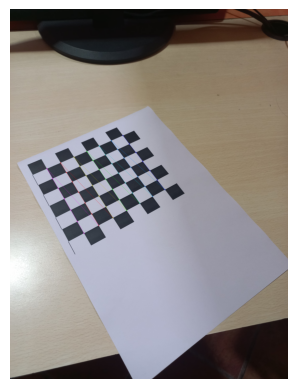

In [12]:
gray = output[0]
plt.imshow(gray)
plt.axis('off')
plt.show()

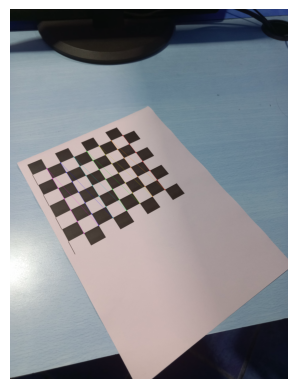

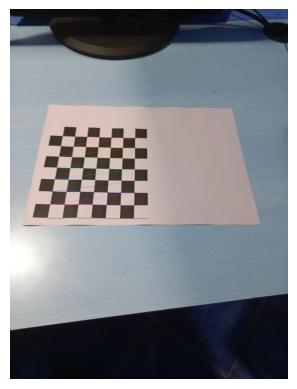

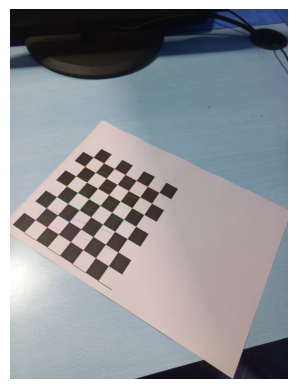

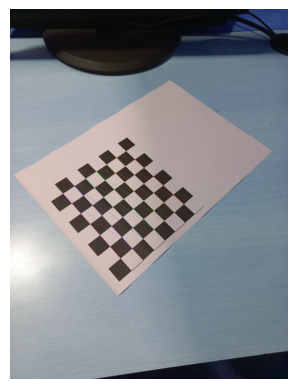

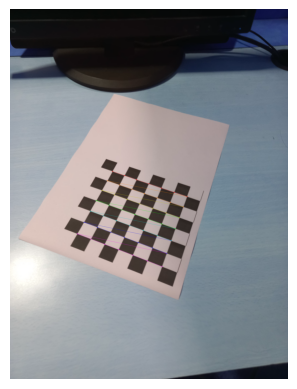

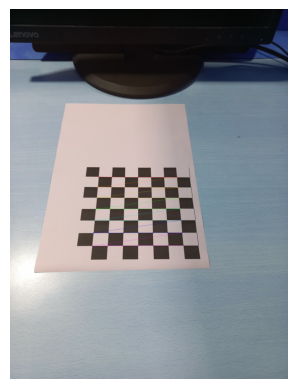

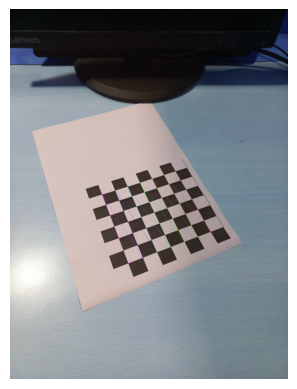

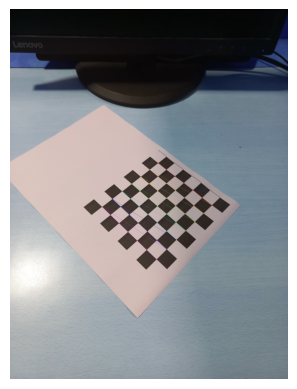

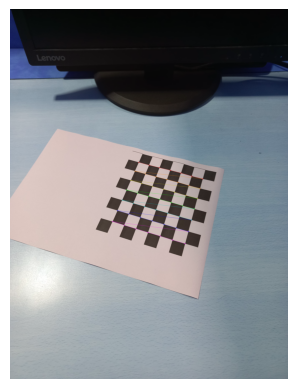

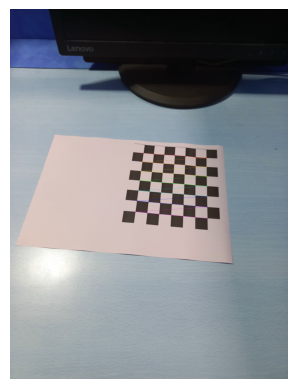

In [13]:
import matplotlib.pyplot as plt

# Display all images in the 'output' list
for img in output:
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [14]:
import cv2 as cv
gray = cv.cvtColor(gray, cv.COLOR_BGR2GRAY)
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


In [15]:
np.set_printoptions(precision=5, suppress=True) 
mtx

array([[6705.75453,    0.     , 1420.9331 ],
       [   0.     , 7128.64839, 2076.23941],
       [   0.     ,    0.     ,    1.     ]])

In [16]:
print(dist)

[[  -0.01315   22.0199     0.23091   -0.04461 -319.96329]]
